In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# from scipy.sparse.csgraph import minimum_spanning_tree
# from sklearn.neighbors import kneighbors_graph
# X = np.random.random((1000,2))#1000pts in 2 dims
# G = kneighbors_graph(X,n_neighbors=10,mode="distance")
# T = minimum_spanning_tree(G)

Not too sure what to do with trees and stuff ..

Clustering tutorial for sklearn here: http://scikit-learn.org/stable/modules/clustering.html

the make_blobs function in sklearn is used to make test data for clustering purposes so that it makes random gaussian blobs around specified centers 

In [12]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [19]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
X = StandardScaler().fit_transform(X)

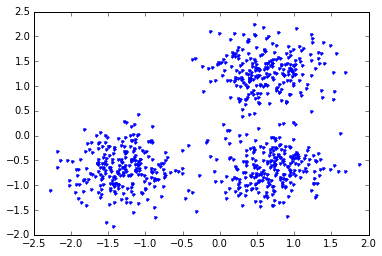

In [21]:
plt.plot(X[:,0],X[:,1],'.')

Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


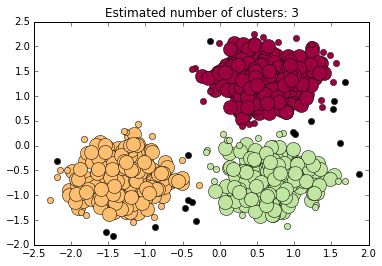

In [23]:

##############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

I haven't quite figured out how this example works '